<a href="https://colab.research.google.com/github/krmonline/PII/blob/main/%E0%B8%8A%E0%B8%B7%E0%B9%88%E0%B8%AD%E0%B8%84%E0%B8%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pythainlp

     |████████████████████████████████| 10.6MB 10.9MB/s 
     |████████████████████████████████| 747kB 42.1MB/s 
     |████████████████████████████████| 133kB 10.9MB/s 
     |████████████████████████████████| 2.0MB 11.9MB/s 


In [ ]:
from bs4 import BeautifulSoup
import requests
import pickle
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#เตรียมชื่อ

In [ ]:
arr_name =  []
n = 0
for j in range(11):
  print("")
  url = "https://www.myhora.com/%E0%B8%94%E0%B8%B9%E0%B8%94%E0%B8%A7%E0%B8%87-%E0%B8%95%E0%B8%B1%E0%B9%89%E0%B8%87%E0%B8%8A%E0%B8%B7%E0%B9%88%E0%B8%AD-%E0%B9%80%E0%B8%9B%E0%B8%A5%E0%B8%B5%E0%B9%88%E0%B8%A2%E0%B8%99%E0%B8%8A%E0%B8%B7%E0%B9%88%E0%B8%AD.aspx?d=5&g=1&b=0&l=%E0%B8%9C%E0%B8%B2%E0%B8%AD%E0%B8%B4%E0%B8%99%E0%B8%97%E0%B8%A3%E0%B9%8C&p="+str(j)
  r = requests.get(url)
  content = BeautifulSoup(r.text).find_all('div',class_='nx_name')
  for i in content:
    n = n +1
    print(n,end=" ")
    name = BeautifulSoup(i.text).find('p').text.strip()
    arr_name.append(name)


1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 
51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 
171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 
221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 
271 272 273 274 275 27

In [ ]:
df_name = pd.DataFrame(arr_name,columns=['name'])
#df_name.to_csv("name.csv",index=False)
df_name.head()

,name
0,กมลภู
1,กรกวรรษ
2,กรณ์
3,กฤศ
4,กฤษิกร


In [ ]:
CHARS = [
  '\n', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+',
  ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8',
  '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E',
  'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R',
  'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_',
  'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
  'n', 'o', 'other', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y',
  'z', '}', '~', 'ก', 'ข', 'ฃ', 'ค', 'ฅ', 'ฆ', 'ง', 'จ', 'ฉ', 'ช',
  'ซ', 'ฌ', 'ญ', 'ฎ', 'ฏ', 'ฐ', 'ฑ', 'ฒ', 'ณ', 'ด', 'ต', 'ถ', 'ท',
  'ธ', 'น', 'บ', 'ป', 'ผ', 'ฝ', 'พ', 'ฟ', 'ภ', 'ม', 'ย', 'ร', 'ฤ',
  'ล', 'ว', 'ศ', 'ษ', 'ส', 'ห', 'ฬ', 'อ', 'ฮ', 'ฯ', 'ะ', 'ั', 'า',
  'ำ', 'ิ', 'ี', 'ึ', 'ื', 'ุ', 'ู', 'ฺ', 'เ', 'แ', 'โ', 'ใ', 'ไ',
  'ๅ', 'ๆ', '็', '่', '้', '๊', '๋', '์', 'ํ', '๐', '๑', '๒', '๓',
  '๔', '๕', '๖', '๗', '๘', '๙', '‘', '’', '\ufeff'
]
CHARS_MAP = {v: k for k, v in enumerate(CHARS)}
def name2arr(x):
  result = ""
  for i in x:
    if i not in CHARS_MAP:
      i = '\ufeff' #OutOfVocab
    if result == "":
      result = str(CHARS_MAP[i])
    else:
      result = result + "," + str(CHARS_MAP[i])
  return result

In [ ]:
df_name["arr_num"] = df_name.name.apply(name2arr)

In [ ]:
df_name['label'] = 1

In [ ]:
df

,name,arr_num,label
0,กมลภู,"94,126,130,125,149",1
1,กรกวรรษ,"94,128,94,131,128,128,133",1
2,กรณ์,"94,128,112,163",1
3,กฤศ,"94,129,132",1
4,กฤษิกร,"94,129,133,144,94,128",1
...,...,...,...
565,ฌัลล์,"105,141,130,130,163",1
566,กมลษัณฑ์,"94,126,130,133,141,112,110,163",1
567,กฤษณพงศ์,"94,129,133,112,123,100,132,163",1
568,เกรียงไกร,"151,94,128,145,127,100,155,94,128",1


In [ ]:
#df_name.to_csv("./name.csv",index=False)

#เตรียมชื่อนามทั่วไป

In [ ]:
import pythainlp.word_vector
import random

In [ ]:
pythainlp.word_vector.get_model().index2word[:100]

['ที่',
 'และ',
 'เป็น',
 'ของ',
 'มี',
 'ได้',
 '""""',
 'การ',
 '(',
 ')',
 'โดย',
 'ส',
 'น',
 'กับ',
 'จะ',
 'ปี',
 'ว่า',
 'จาก',
 ',',
 'ซึ่ง',
 'ให้',
 '',
 'พ.ศ.',
 'ไป',
 '.',
 'อ',
 '-',
 'เมื่อ',
 'มา',
 '์',
 'หรือ',
 'พระ',
 'ก็',
 'อยู่',
 'ร์',
 'นี้',
 'คือ',
 'เ',
 'แต่',
 'ใช้',
 'ค.ศ.',
 'ยัง',
 'คน',
 'ด้วย',
 'เขา',
 'วันที่',
 'ถูก',
 'ไม่',
 'แห่ง',
 'เพื่อ',
 'ๆ',
 'จึง',
 'ทาง',
 'ขึ้น',
 ':',
 '2',
 'ได้รับ',
 'นั้น',
 '1',
 'ผู้',
 'สามารถ',
 'แล้ว',
 'ท',
 'เมือง',
 'ล',
 'บ',
 'ช',
 'กัน',
 'ทำให้',
 '3',
 'ประเทศ',
 'ถึง',
 'ทรง',
 'เธอ',
 'หนึ่ง',
 'ชื่อ',
 'เรื่อง',
 'เพลง',
 'ิ',
 'สร้าง',
 'ะ',
 'ออก',
 'ตาม',
 'ต่อ',
 'เกิด',
 'ไทย',
 'แบบ',
 'ต้อง',
 '()',
 'อีก',
 'ทั้ง',
 'ต่อมา',
 'the',
 'ระหว่าง',
 'จังหวัด',
 'ริ',
 'เอ',
 'ส่วน',
 'ณ',
 'ความ']

In [ ]:
model = pythainlp.word_vector.get_model()
arr_tmp = []
for i  in range(len(df_name)):
  nameID = random.randint(0,2000)
  name = model.index2word[nameID]
  arr_tmp.append(name)
print("Random general word =",len(arr_tmp))
df2 = pd.DataFrame(arr_tmp,columns=['name'])
df2["arr_num"] = df2.name.apply(name2arr) #Check OOV ใน function แล้ว
df2['label'] = 0

Random general word = 570


#Merge Data

In [ ]:
df = pd.concat([df_name,df2])
df.head()

,name,arr_num,label
0,กมลภู,"94,126,130,125,149",1
1,กรกวรรษ,"94,128,94,131,128,128,133",1
2,กรณ์,"94,128,112,163",1
3,กฤศ,"94,129,132",1
4,กฤษิกร,"94,129,133,144,94,128",1


In [ ]:
arr_numID = []
maxlen = 0
n = 0
for i in df.arr_num:
  n = n+1
  #print(n,i)
  arr_tmp = [int(iInt) for iInt in i.split(',')]
  #print(arr_tmp)
  arr_numID.append(arr_tmp)
  #print(i.split(','))
  lentmp = len(arr_numID[-1])
  if maxlen < lentmp:
    maxlen = lentmp
maxlen = int(maxlen*1.5)
print(maxlen)
#ได้ maxlen

22


In [ ]:
arr_numID[:5],df.label.values[:5]

([[94, 126, 130, 125, 149],
  [94, 128, 94, 131, 128, 128, 133],
  [94, 128, 112, 163],
  [94, 129, 132],
  [94, 129, 133, 144, 94, 128]],
 array([1, 1, 1, 1, 1]))

#แบ่ง Train Test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = tf.keras.preprocessing.sequence.pad_sequences(
    arr_numID, maxlen=maxlen, dtype='int32', padding='pre',
    truncating='pre', value=0.0
)
y = df.label.values

In [ ]:
X_trainTMP, X_test, y_trainTMP, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainTMP, y_trainTMP, test_size=0.3, random_state=42)
X_train.shape,y_train.shape,X_valid.shape,y_valid.shape,X_test.shape,y_test.shape,

((638, 22), (638,), (274, 22), (274,), (228, 22), (228,))

In [ ]:
vocab_size = len(CHARS)
print(vocab_size)
del(model)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 1, input_length=maxlen),
    tf.keras.layers.LSTM(1,return_sequences=False),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss=tf.keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])
model.summary()
loss = []
val_loss = []
acc = []
val_acc = []

178
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_24 (Embedding)     (None, 22, 1)             178       
_________________________________________________________________
lstm_22 (LSTM)               (None, 1)                 12        
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 2         
Total params: 192
Trainable params: 192
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_tmp = model.fit(X_train,y_train,epochs=100,validation_data=(X_valid,y_valid),verbose=1)

Epoch 1/100
20/20 [==============================] - 0s 15ms/step - loss: 0.2651 - accuracy: 0.9122 - val_loss: 0.2745 - val_accuracy: 0.9015
Epoch 2/100
20/20 [==============================] - 0s 13ms/step - loss: 0.2641 - accuracy: 0.9122 - val_loss: 0.2734 - val_accuracy: 0.9088
Epoch 3/100
20/20 [==============================] - 0s 13ms/step - loss: 0.2631 - accuracy: 0.9138 - val_loss: 0.2726 - val_accuracy: 0.9088
Epoch 4/100
20/20 [==============================] - 0s 14ms/step - loss: 0.2624 - accuracy: 0.9154 - val_loss: 0.2716 - val_accuracy: 0.9088
Epoch 5/100
20/20 [==============================] - 0s 13ms/step - loss: 0.2612 - accuracy: 0.9154 - val_loss: 0.2706 - val_accuracy: 0.9088
Epoch 6/100
20/20 [==============================] - 0s 13ms/step - loss: 0.2601 - accuracy: 0.9169 - val_loss: 0.2696 - val_accuracy: 0.9088
Epoch 7/100
20/20 [==============================] - 0s 12ms/step - loss: 0.2593 - accuracy: 0.9185 - val_loss: 0.2684 - val_accuracy: 0.9088
Epoch 

In [ ]:
loss.extend(history_tmp.history['loss'])
val_loss.extend(history_tmp.history['val_loss'])
acc.extend(history_tmp.history['accuracy'])
val_acc.extend(history_tmp.history['val_accuracy'])

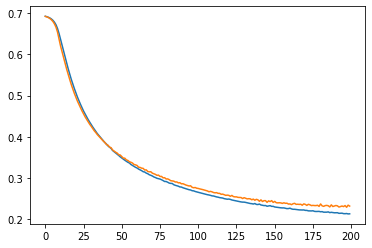

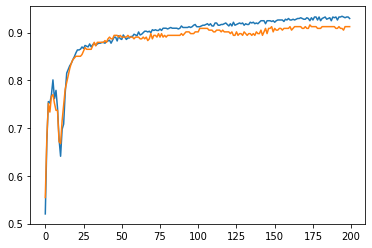

In [ ]:
plt.plot(loss)
plt.plot(val_loss)
plt.show()
plt.plot(acc)
plt.plot(val_acc)

In [ ]:
import  numpy as np
name = "อุทัยวรรณ"
arr = [int(i) for i in name2arr(name).split(",")]
dataTest = tf.keras.preprocessing.sequence.pad_sequences(np.array([arr]), maxlen=maxlen, dtype='int32', padding='pre',truncating='pre', value=0.0)
model.predict(dataTest)

array([[0.95828694]], dtype=float32)

In [ ]:
#history.history

In [ ]:
pred = model.predict_classes(X_test)
y_test

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       100
           1       0.94      0.92      0.93       128

    accuracy                           0.93       228
   macro avg       0.92      0.93      0.92       228
weighted avg       0.93      0.93      0.93       228

